In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import seaborn as sb
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime
from datetime import timedelta
from time import time
%matplotlib inline

In [3]:
co2_emss_df = pd.read_csv(r"C:\Users\ixf9o\Desktop\climate_change_project\co-emissions-per-capita.csv", parse_dates = True)
rainfall_df = pd.read_excel(r"C:\Users\ixf9o\Desktop\climate_change_project\total-rain-fall-in-mm-observed-by-pme-met-station-2009 1.xlsx", parse_dates = True)
humidity_df = pd.read_excel(r"C:\Users\ixf9o\Desktop\climate_change_project\saudi-arabia-average-relative-humidity-in-of-pme-met-stations-december-2013.xlsx", parse_dates = True )
min_temp_df = pd.read_excel(r"C:\Users\ixf9o\Desktop\climate_change_project\minimum-temperature-observed-by-pme-met-stations-2009-degree-centigradexls 1.xlsx", parse_dates = True)
argi_df = pd.read_csv(r"C:\Users\ixf9o\Desktop\climate_change_project\share-of-land-area-used-for-agriculture.csv", parse_dates = True)
urb_df = pd.read_csv(r"C:\Users\ixf9o\Desktop\climate_change_project\urban-population-share-2050.csv",  parse_dates = True )
humidity_df.rename(columns = {'Station':'Region', 'Value':'Humidity'}, inplace = True)

# CO2 Emmisions

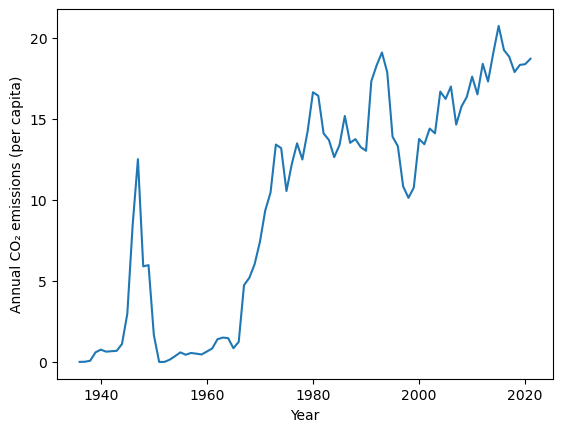

In [10]:
sb.lineplot(x="Year", y="Annual CO₂ emissions (per capita)",data=co2_emss_df.loc[co2_emss_df['Code'] == 'SAU']);

# Rainfall

In [11]:
x = rainfall_df.loc[rainfall_df['Region'].isin(['Riyadh New', 'Makkah', 'Madinah', 'Qassim', 'Abha',  'Dmmam', 
                                'Tabuk', 'Hail', 'Arar', 'Jizan', 'Najran', 'Al-Baha', 'Al-Jouf'])]


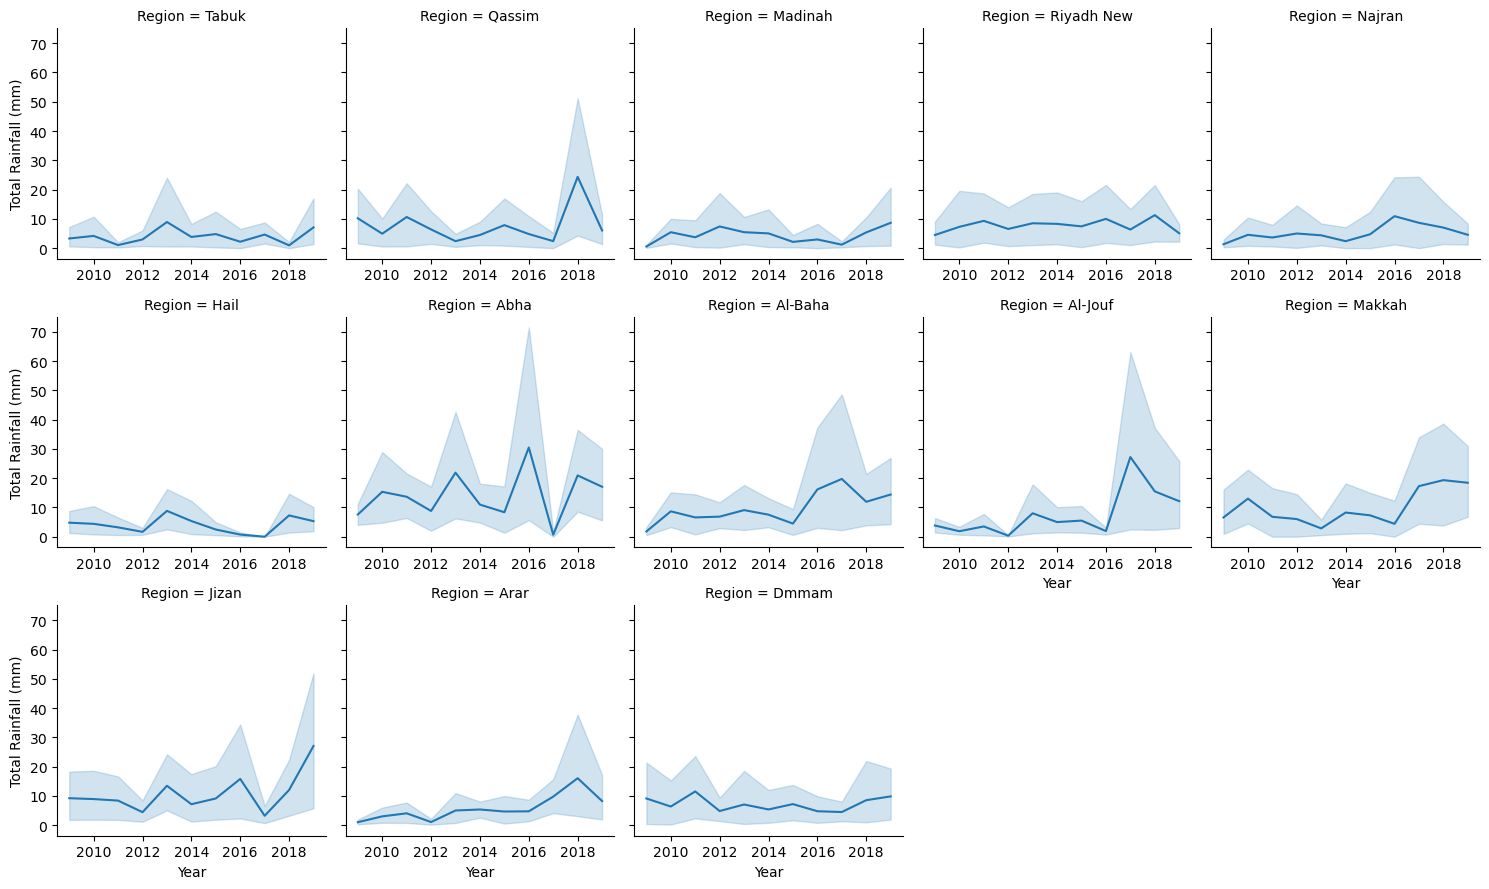

In [12]:
g = sb.FacetGrid(data = x, col = 'Region', col_wrap = 5, sharex = False)
g.map_dataframe(sb.lineplot,x='Year', y="Total Rainfall (mm)");

# Humidity

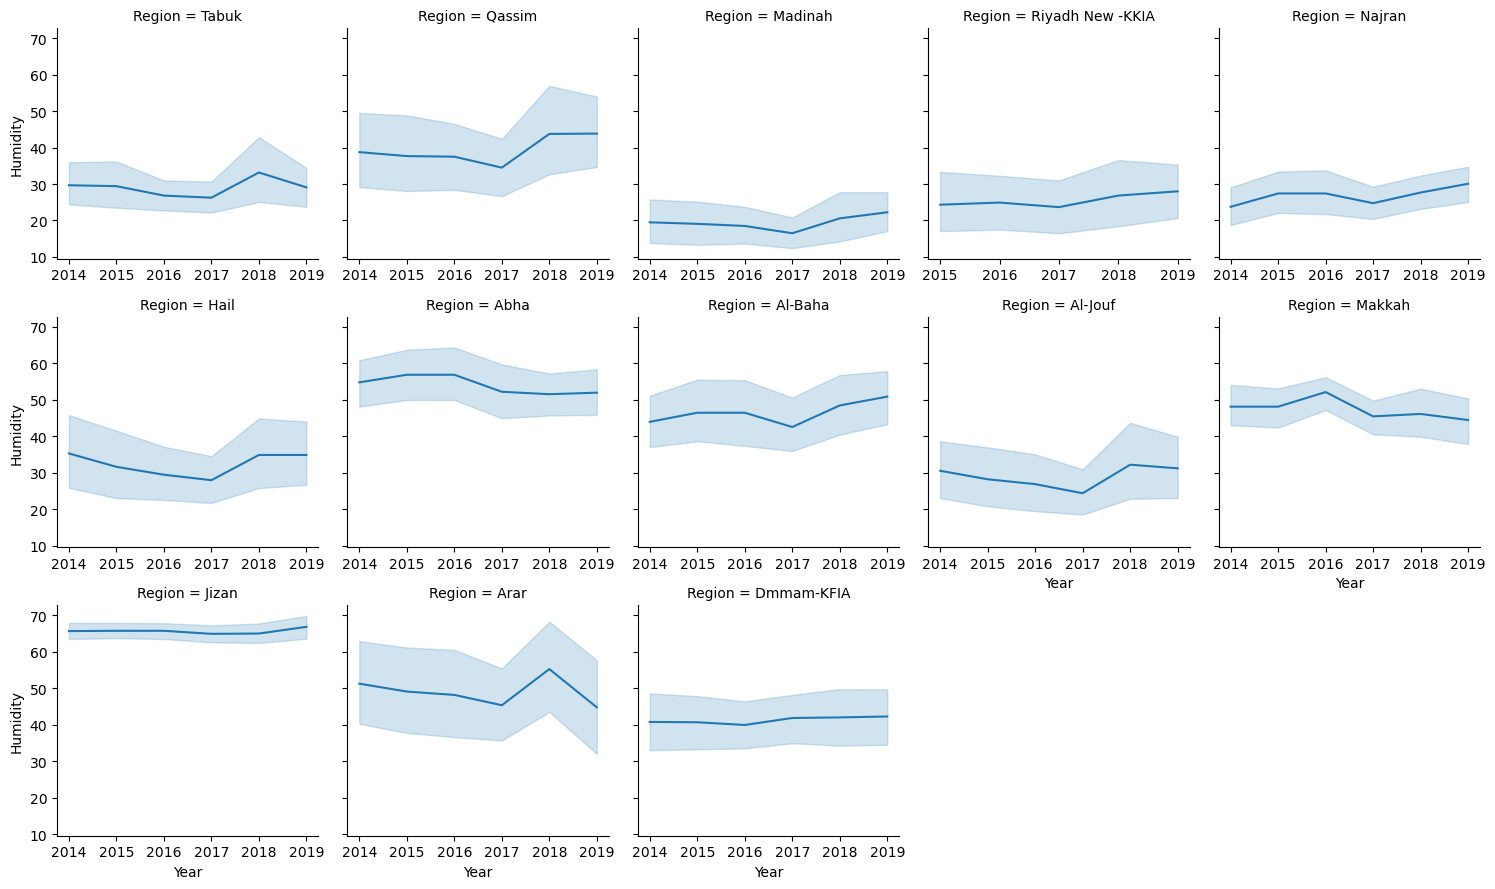

In [58]:
g = sb.FacetGrid(data = humidity_df.loc[humidity_df['Region'].isin(['Riyadh New -KKIA', 'Makkah', 'Madinah',
                                                                     'Qassim', 'Abha',  'Dmmam-KFIA',  'Tabuk', 'Hail', 
                                                                     'Arar', 'Jizan', 'Najran', 'Al-Baha', 'Al-Jouf'])],
                                                                     col = 'Region', col_wrap = 5, sharex = False,
                                                                                        col_order=['Tabuk', 'Qassim', 'Madinah',  
                                                                                                  'Riyadh New -KKIA', 'Najran',
                                                                                                  'Hail', 'Abha', 'Al-Baha', 'Al-Jouf',
                                                                                                  'Makkah', 'Jizan', 'Arar', 'Dmmam-KFIA'])
g.map_dataframe(sb.lineplot,x='Year', y="Humidity");


# Minimum Temperature

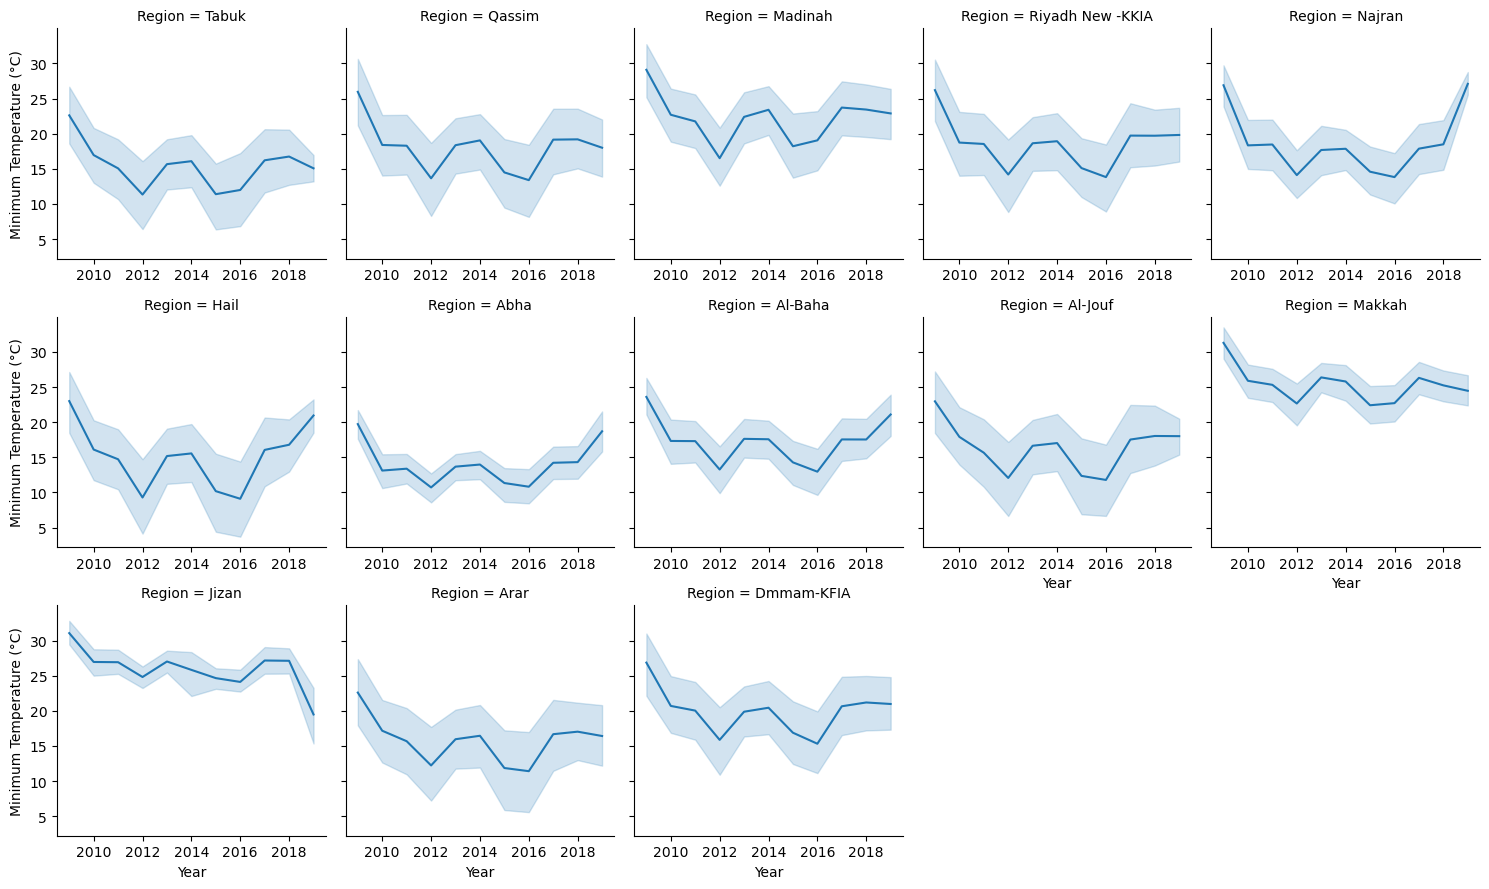

In [60]:
g = sb.FacetGrid(data = min_temp_df.loc[min_temp_df['Region'].isin(['Riyadh New -KKIA', 'Makkah', 'Madinah', 
                                                                    'Qassim', 'Abha',  'Dmmam-KFIA',  'Tabuk', 'Hail', 
                                                                     'Arar', 'Jizan', 'Najran', 'Al-Baha', 'Al-Jouf'])],
                                                                     col = 'Region', col_wrap = 5, sharex = False,
                                                                        col_order=['Tabuk', 'Qassim', 'Madinah',  
                                                                                                  'Riyadh New -KKIA', 'Najran',
                                                                                                  'Hail', 'Abha', 'Al-Baha', 'Al-Jouf',
                                                                                                  'Makkah', 'Jizan', 'Arar', 'Dmmam-KFIA'])
g.map_dataframe(sb.lineplot,x='Year', y="Minimum Temperature (°C)");

In [15]:
new_df = pd.merge(rainfall_df, min_temp_df)

In [16]:
filter_1 =new_df.loc[new_df['Region'].isin(['Riyadh New -KKIA', 'Makkah', 'Madinah',
                                               'Qassim', 'Abha',  'Dmmam-KFIA',  'Tabuk',
                                               'Hail', 'Arar', 'Jizan', 'Najran', 'Al-Baha', 'Al-Jouf'])]

    

In [17]:
filter_2= filter_1.loc[(filter_1['Year'] > 2013)]

# Combined Dataset


In [18]:
new_dataset = pd.merge(filter_2, humidity_df )

In [19]:
new_dataset.head()

,Year,Month,Region,Total Rainfall (mm),Minimum Temperature (°C),Humidity
0,2014,January,Abha,4.4,8.3,73
1,2014,January,Najran,0.0,10.0,40
2,2014,February,Hail,0.0,4.9,50
3,2014,March,Qassim,7.8,15.7,47
4,2014,April,Hail,4.4,16.6,33


# Agricultural land


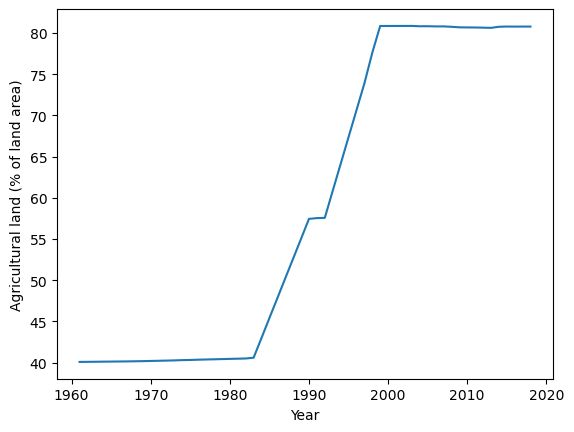

In [78]:
sb.lineplot(x="Year", y="Agricultural land (% of land area)",data=argi_df.loc[argi_df['Code'] == 'SAU']);

# Urban population

In [21]:
filter_1 = urb_df.loc[(urb_df['Year'] < 2021)]

Text(0, 0.5, 'Urban population (%)')

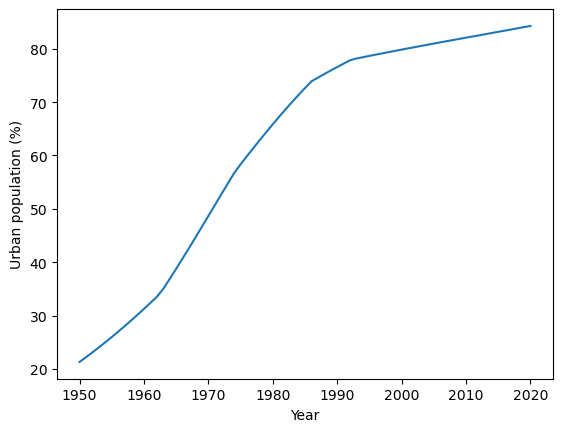

In [92]:
sb.lineplot(x="Year", y="Urban population (%) long-run with 2050 projections (OWID)", data= filter_1.loc[filter_1['Code'] == 'SAU']);
plt.ylabel('Urban population (%)')

In [9]:
co2_emss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26915 entries, 0 to 26914
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             26915 non-null  object 
 1   Code                               23288 non-null  object 
 2   Year                               26915 non-null  int64  
 3   Annual CO₂ emissions (per capita)  26915 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 841.2+ KB


In [16]:
argi_df.corr()

,Year,Agricultural land (% of land area)
Year,1.000000,0.021732
Agricultural land (% of land area),0.021732,1.000000
